# Vision models for image interpretation and code generation
Some models support image input and can interpret the images. This might be useful to guide the large language model when deciding what to do with the image.

In [1]:
import stackview
from skimage.io import imread
from bia_bob import bob
bob.initialize(model="claude-3-opus-20240229", vision_model="claude-3-opus-20240229")
#bob.initialize(model="gpt-4o-2024-05-13", vision_model="gpt-4o-2024-05-13")
#bob.initialize(model="gemini-1.5-pro-latest", vision_model="gemini-1.5-pro-latest")

First, we load an example image.

StackViewNDArray([[[ 3,  6,  1],
                   [ 3,  7,  0],
                   [ 3,  6,  1],
                   ...,
                   [11,  8,  2],
                   [11,  7,  2],
                   [11, 11,  2]],

                  [[ 3,  6,  1],
                   [ 3,  8,  1],
                   [ 3,  7,  1],
                   ...,
                   [11, 10,  2],
                   [10, 10,  2],
                   [11, 11,  2]],

                  [[ 4,  6,  1],
                   [ 3,  6,  1],
                   [ 4,  6,  1],
                   ...,
                   [10, 10,  2],
                   [11, 10,  2],
                   [11, 10,  2]],

                  ...,

                  [[15, 14,  8],
                   [14, 14,  8],
                   [15, 14,  7],
                   ...,
                   [10, 11,  5],
                   [10, 12,  4],
                   [11, 14,  5]],

                  [[14, 16,  7],
                   [16, 15,  7],
                   [15, 16,  8],
                   ...,
                   [10, 11,  4],
                   [11, 13,  4],
                   [11, 16,  5]],

                  [[15, 18,  7],
                   [14, 17,  8],
                   [14, 17,  8],
                   ...,
                   [ 9, 12,  5],
                   [10, 13,  5],
                   [11, 15,  5]]], dtype=uint8)
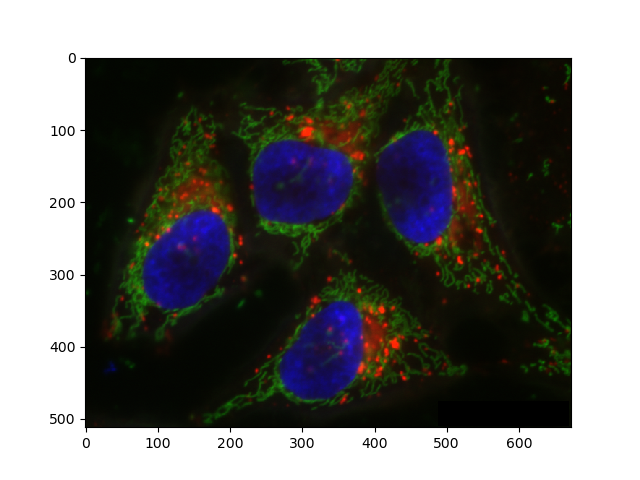
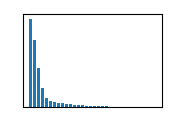

In [2]:
image = imread("hela-cells-8bit.tif")

stackview.insight(image)

We can use vision capabilities by passing the image like this:

In [3]:
%%bob image
what's in the blue channel of this microscopy image? Answer in one short sentence.

The blue channel shows cell nuclei in this microscopy image.

In [4]:
%%bob 
Please segment the nuclei and use stackview.animate_curtain 
to show the resulting label image on top of the original image.

C:\Users\haase\miniconda3\envs\genai2\Lib\site-packages\stackview\_animate.py:61: UserWarning: The image is quite large (> 10 MByte) and might not be properly shown in the notebook when rendered over the internet. Consider subsampling or cropping the image for visualization purposes.
  warnings.warn("The image is quite large (> 10 MByte) and might not be properly shown in the notebook when rendered over the internet. Consider subsampling or cropping the image for visualization purposes.")



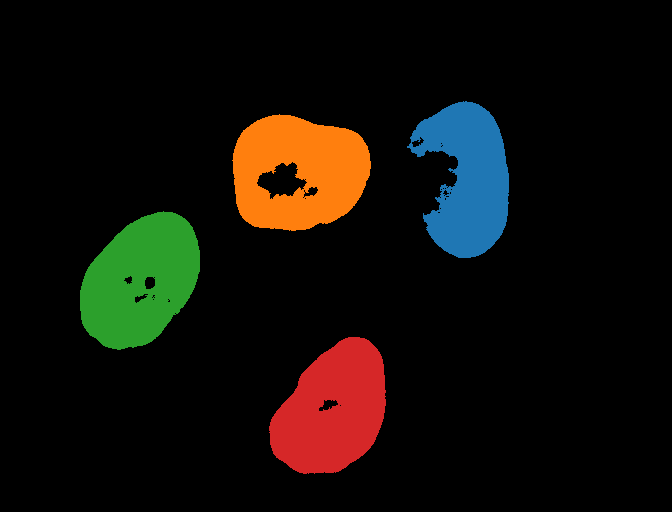

In [5]:
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects
from skimage.measure import label

# Extract the blue channel
blue = image[:,:,2]

# Apply a threshold to create a binary mask
thresh = threshold_otsu(blue)
mask = blue > thresh

# Remove small objects
mask = remove_small_objects(mask, min_size=50)

# Label the connected components
labels = label(mask)

# Display the label image on top of the original image
stackview.animate_curtain(image, labels)